# Navigating the Multimodal Map: Insights into Foundation Models

## Day 1: Segment Anything Model (SAM) Concept Cove: Hands-on with multimodal models

#### Author: Ricardo Mokhtari

#### Course instructors: Sylwia Majchrowska and Ricardo Mokhtari, Centre for AI, DS&AI, BioPharma R&D, AstraZeneca.

![LOGO PLACEHOLDER](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/logo.jpg?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)

## Description of the hands on session

In this session we will be looking at multi-modal machine learning from the point of view of the model. Specifically, we will be using a multi modal model that performs the following task:

* *Given a input image (for example, an image of a bowl of fruits on a table) and a text prompt (for example, "strawberries"), the model will output the segmentation masks of only the strawberries*.

There now exist many models capable of solving this task. However, for the purposes of this workshop, we will be working with LangSAM. Specically, we will explore 3 concepts of increasing technical challenge:


**1. Using LangSAM to segment natural images: deep dive into multimodal data fusion**

**2. Using LangSAM for medical images**

**3. (Exercise) Combining LangSAM and medSAM for improved medical image segmentation**

## Navigating this notebook

*This notebook is designed to be self-contained. Therefore, there are long descriptions in the markdown cells. You do not need to read all of the information here during the hadns on session. Instead, focus on running/modifying the code, and after the session detailed explanations are provided for you to go deeper into the topics.*

___

# Part 1: Using LangSAM to segment natural images

In part 1 of this notebook, we are going to learn how to use the LangSAM model to segment everyday objects in images.

# LangSAM = Grounding DiNO + SAM

[LangSAM](https://github.com/luca-medeiros/lang-segment-anything/tree/main) is an extention to [SAM](https://github.com/facebookresearch/segment-anything) that allows us to segment objects in image by giving text prompts. This is an extension to SAM because SAM can only segment specific objects in images when given a point or bounding box prompt.

LangSAM achieves this by combing SAM with another model, called [Grounding DiNO](https://github.com/IDEA-Research/GroundingDINO/tree/main). Grounding DiNO takes in an image and text prompt, and predicts bounding boxes for the objects in the text prompt. These bounding boxes are then passed to SAM as input, to get the final segmentation masks. It's a neat way of adding text prompt segmentation to SAM. See the figure below.

While both Grounding DiNO and SAM are multimodal, since they handle images + one other input modality, for the purposes of this notebook, we will be looking into the architecture of Grounding DiNO, as this is where the language/image fusion happens. The following 2 sections go into these 2 models in a bit more detail.

![LANGSAM PLACEHOLDER](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/LangSAM.png?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)

## Grounding DiNO

At a high level, Grounding DiNO is a model that takes in an image and a text prompt, and returns bounding boxes corresponding to the objects mentioned in the text prompt. A detailed view at how Grounding DiNO combines text and images is shown below.

While the below figure is quite complicated, we will zoom in on the key multimodal aspects of Grounding DiNO. Typically, for multimodal models combining images and text/other prompts, a dual-encoder + shared decoder setup is very common and has proved to work very well. You can see this below with the separate text/image backbone encoders adn the shared cross-modality decoder.

Later in this notebook, we will dig deeper into the underlying mechanism that facilitates the fusion of modalities - cross attention.

![GROUNDING DINO PLACEHOLDER](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/grounding_dino.png?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)
Image Credit: https://arxiv.org/pdf/2303.05499


## SAM

At a high level, Segment Anything Model (SAM) is a model that takes in an image and a prompt in the form of a point or a bounding box and produces valid segmentation masks for objects defined by the prompt. An overview of the SAM model is shown below.

Again here we see the common dual encoder, shared decoder setup that is common in multimodal models. We will not dive deeper into the SAM architecture, but cross-attention is used in a very similar way to Grounding DiNO to fuse data from the 2 modalities.

![SAM PLACEHOLDER](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/SAM.png?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)
Image Credit: https://arxiv.org/abs/2304.02643



# PLEASE RUN THE CELL BELOW TO COMPLETE THE SETUP (should take around 5 minutes)

In [ ]:
# first, we need to clone and install LangSAM
!git clone https://github.com/luca-medeiros/lang-segment-anything
!pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

# imports
from PIL import Image
from lang_sam import LangSAM
import matplotlib.pyplot as plt
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# initialise the LangSAM model
model = LangSAM()

Cloning into 'lang-segment-anything'...
remote: Enumerating objects: 234, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 234 (delta 73), reused 66 (delta 54), pack-reused 128
Receiving objects: 100% (234/234), 13.23 MiB | 18.50 MiB/s, done.
Resolving deltas: 100% (96/96), done.
  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-tjw9bz49
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-tjw9bz49
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit 831cdc10906a23aabe4591a4be06f4c989e4ee30
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-oftka0kc/groundingdino_27daae336aa64848afd3267b1e4cb05a
  Running comman

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:10<00:00, 255MB/s]


## Below is the code for initialising the main langSAM functions

In [ ]:
def display_image_with_masks(image, masks):
    """Function for plotting the predicted masks from SAM

    image (PIL.Image): input image as PIL.Image RGB
    masks: output masks from LangSAM
    """
    # get the number of masks
    num_masks = len(masks)
    # if there were no predicted masks, exit
    if num_masks == 0:
        print("no masks found")
        return

    # create figure and plot
    fig, axes = plt.subplots(1, num_masks + 1, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # plot each mask as a new figure
    # TODO:
    for i, mask_np in enumerate(masks):
        axes[i+1].imshow(mask_np, cmap='gray')
        axes[i+1].set_title(f"Mask {i+1}")
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()

def display_image_with_boxes(image, boxes, logits):
    """Function for overlaying predicted bounding boxes on the image

    image (PIL.Image): input image as PIL.Image RGB
    boxes (np.array): coordinates of the bounding boxes
    logits (torch.tensor): the logits for each bounding box prediction
    """
    # creat the figure
    fig, ax = plt.subplots(dpi=150)
    ax.imshow(image)
    ax.set_title("Image with Bounding Boxes")
    ax.axis('off')

    # for each box and logit
    for box, logit in zip(boxes, logits):
        # getting the coordinates
        x_min, y_min, x_max, y_max = box
        confidence_score = round(logit.item(), 2)  # Convert logit to a scalar before rounding
        box_width = x_max - x_min
        box_height = y_max - y_min

        # Draw bounding box
        rect = plt.Rectangle((x_min, y_min), box_width, box_height, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

        # Add confidence score as text
        ax.text(x_min, y_min, f"Confidence: {confidence_score}", fontsize=8, color='red', verticalalignment='top')

    plt.show()

### In the cell below, you can play around with LangSAM. You can replace the image inputted by giving a new path to image_pil. You can edit the text prompt to segment different objects.

### You can adjust some of the LangSAM parameters to fine-tune your prediction. "box_threshold" defines the confidence needed for the bounding box prediction to be displayed - lowering this value means you will get more prediction outuputs

### There are 5 different images in the inference_images/natural_images folder. These images are from the [COCO dataset](https://cocodataset.org/#home)

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


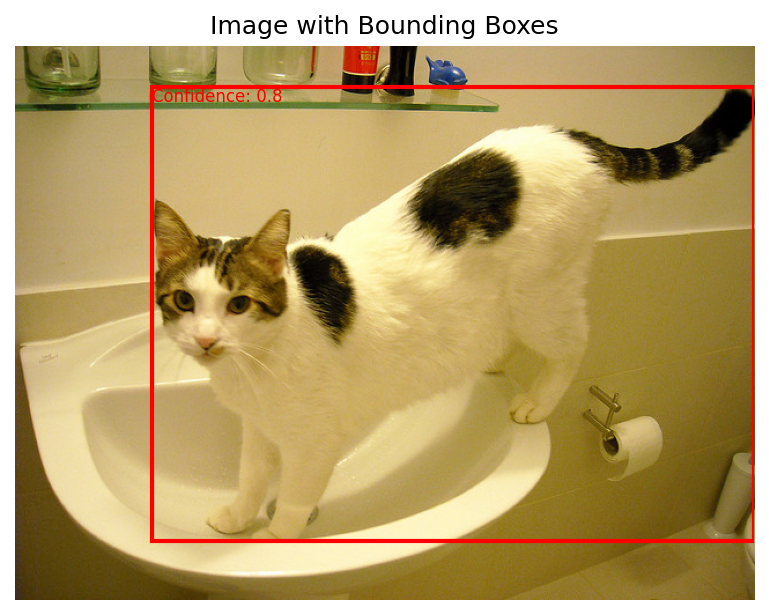

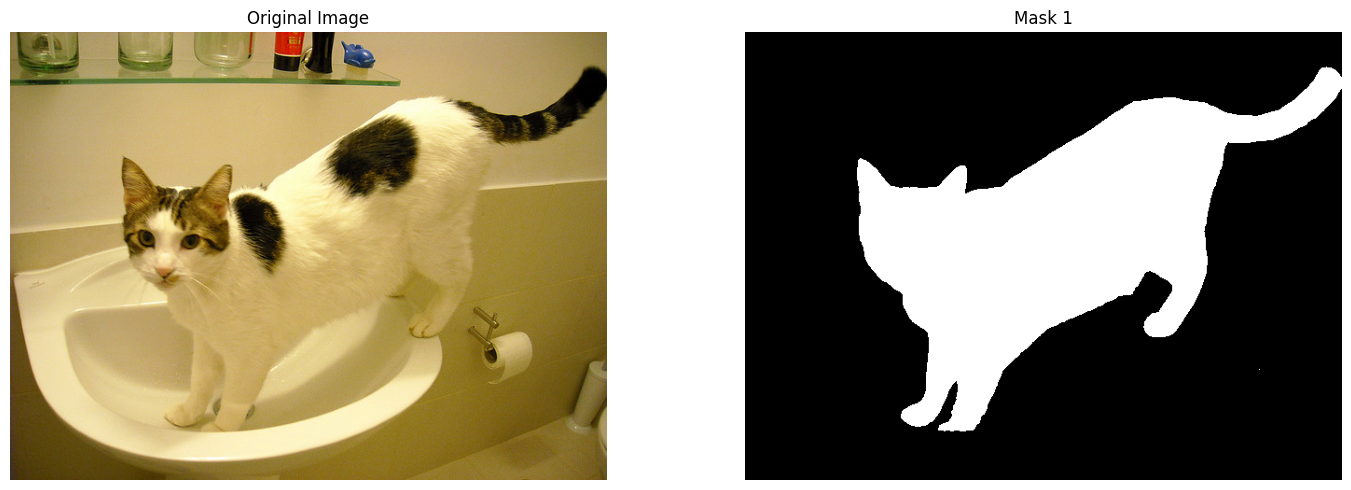

In [ ]:
# input your image here - there are 5 images each with filepath X.jpg
file_path = "../img/inference_images/natural_images/1.jpg"
image_pil = Image.open(file_path).convert("RGB")

# input your text prompt here - tip: if you want to segment multiple different
# objects, try separating them with a full stop.
text_prompt = "cat"

# run inference
masks, boxes, phrases, logits = model.predict(image_pil, text_prompt, box_threshold=0.35)

# display the predictions
display_image_with_boxes(image_pil, boxes, logits)
display_image_with_masks(image_pil, masks)

## In the next cell we will look at how the text-image fusion is performed. In Groudning DiNO, this is done using cross attention.

#### What is attention?

![SELF ATTENTION PLACEHOLDER](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/self_attention.png?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)
Image credit: Raimi Karim, https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a

"Attention" generally in machine learning is a concept that originated in natural language processing (NLP). In language, a single word can have multiple meanings depending on the context. For example, the word "great" is generally positive. However, depending on the context, for example "that trip was a great waste of my time" it can have a negative context. The context length can also vary greatly. For example, "the trees were so tall they stretched hundreds of metres in the air and were so wide that you could not wrap your arms around them.". In this sentence, even though there are many nouns, the word "them" refers specically to the word "trees" and no other word. Yet the word "trees" is located very far away in the sentence from the word "them".

Attention is a modelling approach to capture these inter-word relations. The same concepts are true of images - the spatial organisation of objects can span the entire scene and an object's context can change the meaning of the scene. More specifically, an attention mechanism will process a sequence of inputs (for example words or image patches) and capture how strongly each word is related to all other words. In this way, attention models words in their context over the entire sequence (sentence of whole image).

The most common form of attention is self-attention, where the importance of a given input (eg. word) to all other inputs, including itself, are calculated. For a deep dive into how self-attention works, please look at this [excellent blog](https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a).

#### What is cross attention?

![CROSS ATTENTION PLACEHOLDER](https://raw.githubusercontent.com/AstraZeneca/multimodal-python-course/main/img/cross_attention.png?_sm_au_=iVV6FPN3JnHkMf1ZpGsWvKttvN1NG)
Image credit: Vaclav Kosar, https://vaclavkosar.com/ml/cross-attention-in-transformer-architecture


Cross attention is a specific type of the general attention mechanism. It is slightly different from the more commonly known self-attention that powers models like ChatGPT and other transformers. Self-attention works based on a single input sequence. The sequence (where each token is transformed into an embedding) is fed into a self attention module. The self attention module calculates how important each entry in the sequence is to all other entries, including itself.

However, in cross attention, we don't just have one sequence, we have 2. For example, we have a sequence of text features, and a sequence of image features. Cross attention allows to compute the importance of all text features to all image features, and the other way round. In the end, we transform the text and image features to new features that capture information from both modalities.

#### Understanding the model's embeddings

Plotting the emebddings of a model can be a very useful tool for understanding what the model has learnt. By plotting the embeddings, we can start to explore the models latent space and understand what features of different data points the model considers to be similar. For example, if we plot embeddings for all our data points and we see that cats and dogs are grouped together in one cluster and that cars and trucks are grouped into another cluster, then we can have some confidence that the model has learnt that animals and vehicles have distinct features and that the model is able to distinguish them.

On Day 2, you will see a real world example of embeddings plotting and how it can be useful. Below we have provided a toy example for completeness, although the embeddings below are only randomly generated.

For a great and short video looking into these concepts in more detail, click [here](https://www.youtube.com/watch?v=aw3H-wPuRcw&list=WL&index=36)

First, we create the inputs, which are 2 sequences of embeddings
Sequence 1 (x1) has shape [batch size (BS), sequence 1 length (SL1), input size (IS)]: torch.Size([1, 3, 2])
x1:
 tensor([[[ 1.5410, -0.2934],
         [-2.1788,  0.5684],
         [-1.0845, -1.3986]]])
Sequence 2 (x2) has shape [batch size (BS), sequence 2 length (SL2), input size (IS)]: torch.Size([1, 3, 2])
x2:
 tensor([[[ 0.4033,  0.8380],
         [-0.7193, -0.4033],
         [-0.5966,  0.1820]]])

First we transform x1 to the query space
Shape of query (Q) [BS, SL1, hidden dim (HD)]: torch.Size([1, 3, 2])

Next we transform x2 to the key space
Shape of key (K) [BS, SL2, hidden dim (HD)]: torch.Size([1, 3, 2])

Next we transform x2 to the value space
Shape of value (V) [BS, SL2, hidden dim (HD)]: torch.Size([1, 3, 2])

Next, we compute the dot product attention between the query and key (transposed)
Shape of query: torch.Size([1, 3, 2]), Shape of transposed key: torch.Size([1, 2, 3])
Shape of attention matrix [BS, SL

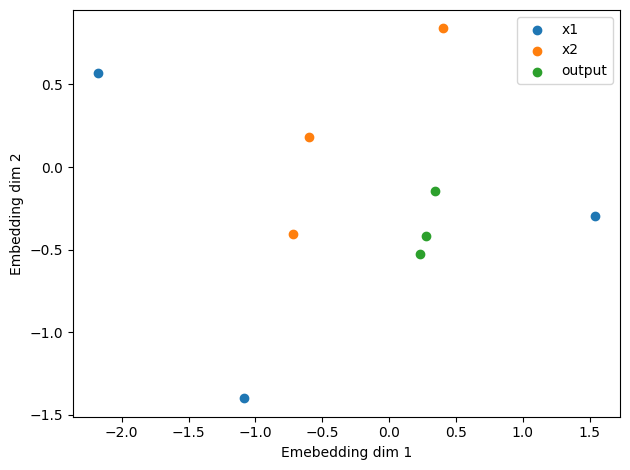

In [ ]:
# cross attention toy example
import torch
import torch.nn as nn

# change here if you want to see slightly different outputs
torch.manual_seed(0)

def plot_embeddings(x1, x2, output):
    """Functio for plotting embeddings
    x1 - the embeddings of sequence 1
    x2 - the embeddings of sequence 2
    output - the emebeddings after cross attention
    """
    # we can only plot 2 dimensional embeddings
    if x1.shape[2] == 2 and x2.shape[2] == 2 and output.shape[2] == 2:

        # get the x and y of all embeddings
        x1_x = x1.numpy()[0,:,0]
        x1_y = x1.numpy()[0,:,1]

        x2_x = x2.numpy()[0,:,0]
        x2_y = x2.numpy()[0,:,1]

        output_x = output.numpy()[0,:,0]
        output_y = output.numpy()[0,:,1]

        # create plot
        plt.figure()
        plt.scatter(x1_x, x1_y, label="x1")
        plt.scatter(x2_x, x2_y, label="x2")
        plt.scatter(output_x, output_y, label="output")
        plt.xlabel("Emebedding dim 1")
        plt.ylabel("Embedding dim 2")
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print("The dimensions of the embeddings is not 2, these can't be plottted")
        return

class CrossAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        """Initialistion toy cross attention example
        input_dim - the dimensions of the input embeddings
        hidden_dim - the dimension of the attention blocks
        """
        super(CrossAttention, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        # Linear transformation for query, key, and value
        self.linear_query = nn.Linear(input_dim, hidden_dim)
        self.linear_key = nn.Linear(input_dim, hidden_dim)
        self.linear_value = nn.Linear(input_dim, hidden_dim)

        # Softmax layer for attention weights
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x1, x2):
        # x1: (batch_size, seq_len1, input_dim)
        # x2: (batch_size, seq_len2, input_dim)

        print("First, we create the inputs, which are 2 sequences of embeddings")
        print(f"Sequence 1 (x1) has shape [batch size (BS), sequence 1 length (SL1), input size (IS)]: {x1.shape}")
        print(f"x1:\n {x1}")
        print(f"Sequence 2 (x2) has shape [batch size (BS), sequence 2 length (SL2), input size (IS)]: {x2.shape}")
        print(f"x2:\n {x2}\n")

        # Project input vectors to the hidden space
        print("First we transform x1 to the query space")
        query = self.linear_query(x1)  # (batch_size, seq_len1, hidden_dim)
        print(f"Shape of query (Q) [BS, SL1, hidden dim (HD)]: {query.shape}\n")

        print("Next we transform x2 to the key space")
        key = self.linear_key(x2)      # (batch_size, seq_len2, hidden_dim)
        print(f"Shape of key (K) [BS, SL2, hidden dim (HD)]: {key.shape}\n")

        print("Next we transform x2 to the value space")
        value = self.linear_value(x2)  # (batch_size, seq_len2, hidden_dim)
        print(f"Shape of value (V) [BS, SL2, hidden dim (HD)]: {value.shape}\n")

        # Compute attention scores
        print("Next, we compute the dot product attention between the query and key (transposed)")
        attn_scores = torch.bmm(query, key.transpose(1, 2))  # (batch_size, seq_len1, seq_len2)
        print(f"Shape of query: {query.shape}, Shape of transposed key: {key.transpose(1,2).shape}")
        print(f"Shape of attention matrix [BS, SL1, SL2]: {attn_scores.shape}")
        print(f"Raw attention matrix:\n {attn_scores}\n")

        # Apply softmax to get attention weights
        print("Next, we simply apply the softmax to the attention matrix")
        attn_weights = self.softmax(attn_scores)  # (batch_size, seq_len1, seq_len2)
        print(f"Softmaxed attention matrix:\n {attn_weights}\n")

        # Apply attention weights to values
        print("Finally, we multiply the softmaxed attention weights with the value matrix")
        attended_values = torch.bmm(attn_weights, value)  # (batch_size, seq_len1, hidden_dim)
        print(f"Shape of output [BS, SL1, HD]: {attended_values.shape}")
        print(f"Final output:\n {attended_values}")

        return attended_values

# Set dimensions of everything
input_dim = 2   # the dimension of the input embeddings
hidden_dim = 2  # the dimension of the attention blocks
batch_size = 1  # the batch size (ignore)
seq_len1 = 3    # the length of the first sequence (number of embeddings)
seq_len2 = 3    # the length of the second sequence (number of embeddings)

# remove gradients
with torch.no_grad():
    # create some dummy embeddings
    x1 = torch.randn(batch_size, seq_len1, input_dim)
    x2 = torch.randn(batch_size, seq_len2, input_dim)

    # apply cross attention
    cross_attention = CrossAttention(input_dim, hidden_dim)
    output = cross_attention(x1, x2)

    plot_embeddings(x1, x2, output)

## The implementation of Cross Attention in Grounding DiNO

Above we looked at a toy example of cross attention. Below we can see how it is implemented in the Grounding DiNO model. We can do this by extracting the weights of the part of the model that performs this operation and passing some dummy inputs through it.

In [ ]:
import torch
import numpy as np
from groundingdino.util.misc import NestedTensor
import groundingdino.datasets.transforms as T
from groundingdino.util import get_tokenlizer
from groundingdino.models.GroundingDINO.backbone.swin_transformer import SwinTransformer

def preprocess_caption(caption: str) -> str:
    result = caption.lower().strip()
    if result.endswith("."):
        return result
    return result + "."

# remove grounding dino model from langsam
grounding_dino = model.groundingdino

with torch.no_grad():

    # extract the first "fusion layer" which performs cross attention
    w = grounding_dino.transformer.encoder.fusion_layers[0]
    print(w)

    # creating some inputs of shape [batch, sequence length, embedding size]
    v = torch.rand(1,28,256).to(device)
    print(f"input sequence 1 v: {v.shape}")
    l = torch.rand(1,28,256).to(device)
    print(f"input sequence 2 l: {v.shape}")
    out = w.forward(v,l)
    print(f"output of fusion layer: {out[0].shape}")

BiAttentionBlock(
  (layer_norm_v): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (layer_norm_l): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (attn): BiMultiHeadAttention(
    (v_proj): Linear(in_features=256, out_features=1024, bias=True)
    (l_proj): Linear(in_features=256, out_features=1024, bias=True)
    (values_v_proj): Linear(in_features=256, out_features=1024, bias=True)
    (values_l_proj): Linear(in_features=256, out_features=1024, bias=True)
    (out_v_proj): Linear(in_features=1024, out_features=256, bias=True)
    (out_l_proj): Linear(in_features=1024, out_features=256, bias=True)
  )
  (drop_path): DropPath(drop_prob=0.100)
)
input sequence 1 v: torch.Size([1, 28, 256])
input sequence 2 l: torch.Size([1, 28, 256])
output of fusion layer: torch.Size([1, 28, 256])


If you are curious about playing around specifically with the image and text embeddings that come out of grounding dino, for example, for plotting purposes, you can extract the image and text embedders from grounding dino and run them separately on each input, as in the cell below.

In [ ]:
# encoder texts
dummy_caption = preprocess_caption("here. is. some. text.")
dummy_image = torch.rand(1,3,224,224).to(device)

with torch.no_grad():
    # image encoder
    trans = grounding_dino.backbone[0]
    trans = trans.to(device)
    img_enc = trans.forward_raw(dummy_image.to(device))[0]
    print(f"shape of image enc: {img_enc.shape}")

    # text encoder
    bert = grounding_dino.bert
    tokenized = grounding_dino.tokenizer(dummy_caption, padding="longest", return_tensors="pt").to(device)
    text_enc = bert(**tokenized)  # bs, 195, 768
    print(f"shape of text enc: {text_enc.pooler_output.shape}")

shape of image enc: torch.Size([1, 256, 28, 28])
shape of text enc: torch.Size([1, 768])


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


# Part 2: Using LangSAM to segment medical images

In this part, we are going to attempt to use LangSAM to segment objects in medical images. Since the components of LangSAM (grounding DiNO and SAM) were both trained only with natural, non medical images, it's likely that it will struggle.

In the inference_images/medical_images folder, there are 3 images of breast ultrasounds, taken from [this dataset](https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset). Each image has an associated mask so you can check how well each image has been segmented.

As part of this exercise, try to probe where the problem lies with langSAM - is it with Grounding DiNO (bounding boxes produced do not reflect the medical object) or with SAM (valid segmentation masks are not produced in the bounding box region)?

In addition, especially for the breast cancer set, try to probe how the text prompts are interpreted by Grounding DiNO. For example, does Grounding DiNO produce the same bounding box when you use different prompts other than "tumor"? This points towards the robustness of how well different concepts are represented in Grounding DiNO's embedding space.

Try to see if there is any way to use prompt engineering (modifying your text prompt) to improve the outputs of either model.

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


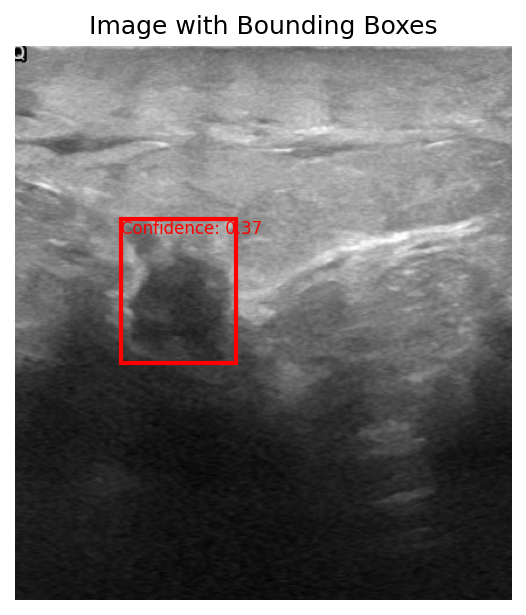

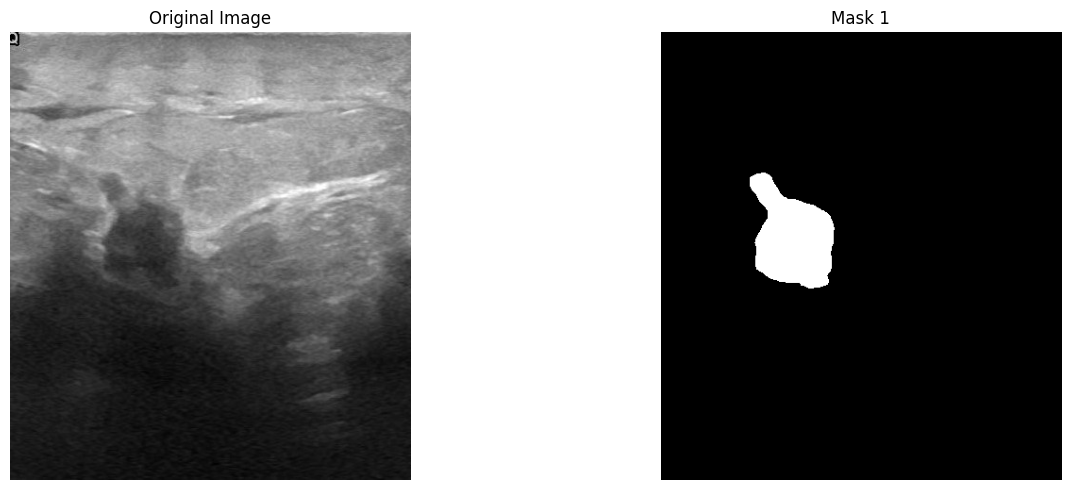

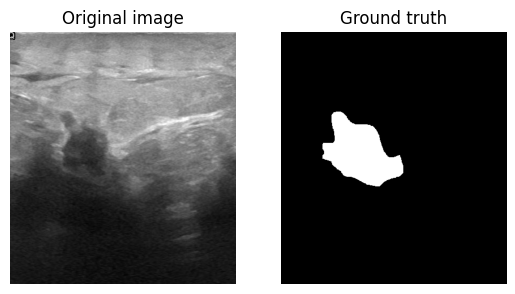

In [ ]:
def display_medical_image(filepath, text_prompt=""):
    """
    Function for displaying prediction and GT for medical images

    filepath (str): path to file
    text_promot (str): the text prompt for Grounding dino
    filetype (str): "breast_ultrasound" or "pathology"
    """

    # input your image here
    image_pil = Image.open(filepath).convert("RGB")

    # run inference
    masks, boxes, phrases, logits = model.predict(image_pil, text_prompt, box_threshold=0.35)

    # display the predictions
    display_image_with_boxes(image_pil, boxes, logits)
    display_image_with_masks(image_pil, masks)

    try:
        mask_path = filepath[:-4]+"_mask.png"

        fig, axs = plt.subplots(nrows=1, ncols=2)
        axs[0].imshow(image_pil)
        axs[0].set_title("Original image")
        axs[0].axis('off')
        axs[1].imshow(Image.open(mask_path))
        axs[1].set_title("Ground truth")
        axs[1].axis('off')

        plt.show()
    except:
        print("no ground truth found!")

# load in a medical image - stored in inference_images/medical_images
display_medical_image(
    "../img/inference_images/medical_images/malignant_3.png",
    text_prompt="tumor",
)

# Part 3 (Exercise): Replacing SAM in LangSAM with MedSAM for improved masks

*This is an optional exercise for those interested in continuing extending their learning on this topic.*

In Part 2 above, we saw that LangSAM performs poorly for medical image segmentation. The question is can we do anything to improve it? The best way would be to replace either or both of Grounding DiNO and SAM with versions that were trained on medical images. For this exercise, we will focus on replacing the SAM model with MedSAM, which is a version of SAM that was trained on a large dataset of medical images.

## Guidance

Below we have provided some skeleton code for loading in the MedSAM model and running segmentation on an example CT image. You can clearly see from this example that MedSAM is superior to SAM for medical images, as it is able to precisely segment the rather faint object in the bounding box. In the following, we will point to the key functions and I/O that needs to be edited to replace SAM with medSAM.

The main difficulty you will run into here is the difference between how SAM and MedSAM handle inputs and outputs - make sure that you print the shapes of all input/output variables to investigate what they represent.

To get started - the main driving code for LangSAM is in lang-segment-anything/lang_sam.py. Below is a modified snippet of the 3 prediction functions that you will need to edit. You will see that there is a **predict_sam()** method - try to add a new method **predict_medsam()** that will load the medsam model, receive the boxes from **predict_dino()** and create the segmentation masks.

Good luck! If you are able to complete this exercise, consider sharing your findings and learnings with the rest of the group. Do you think that replacing SAM with medSAM is enough to make LangSAM usable for medical images? Or is it more important to get good bounding boxes first/understand medical language in the first step?

```python
""" this code is a snippet from from lang-segment-anything/lang_sam.py"""
# function for predicting the bounding boxes with grounding DiNO
# input is the image, text prompt and thresholds
def predict_dino(self, image_pil, text_prompt, box_threshold, text_threshold):
    image_trans = transform_image(image_pil)
    boxes, logits, phrases = predict(model=self.groundingdino,
                                        image=image_trans,
                                        caption=text_prompt,
                                        box_threshold=box_threshold,
                                        text_threshold=text_threshold,
                                        device=self.device)
    W, H = image_pil.size
    boxes = box_ops.box_cxcywh_to_xyxy(boxes) * torch.Tensor([W, H, W, H])

    return boxes, logits, phrases

# function for predicting with sam
# input is the image and the boxes that come out of the above function
def predict_sam(self, image_pil, boxes):
    image_array = np.asarray(image_pil)
    self.sam.set_image(image_array)
    transformed_boxes = self.sam.transform.apply_boxes_torch(boxes, image_array.shape[:2])
    masks, _, _ = self.sam.predict_torch(
        point_coords=None,
        point_labels=None,
        boxes=transformed_boxes.to(self.sam.device),
        multimask_output=False,
    )
    return masks.cpu()

def predict_medsam(self, ...):
    ### Your code here ###

# the overall prediction functiont that combines the above 2 methods
# input
def predict(self, image_pil, text_prompt, box_threshold=0.3, text_threshold=0.25, sam_model="SAM"):
    boxes, logits, phrases = self.predict_dino(image_pil, text_prompt, box_threshold, text_threshold)
    masks = torch.tensor([])
    if len(boxes) > 0:
        if sam_model == "SAM":
            masks = self.predict_sam(image_pil, boxes)
            masks = masks.squeeze(1)
        else:
            ### Your code here ###
    return masks, boxes, phrases, logits
```

In [ ]:
# run this cell for the necessary installations - ignore colab warnings
!pip install git+https://github.com/bowang-lab/MedSAM.git

  Cloning https://github.com/bowang-lab/MedSAM.git to /tmp/pip-req-build-5i82hys3
  Running command git clone --filter=blob:none --quiet https://github.com/bowang-lab/MedSAM.git /tmp/pip-req-build-5i82hys3
  Resolved https://github.com/bowang-lab/MedSAM.git to commit 2b7c64cf80bf1aba546627db9b13db045dd1cbab
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.3/383.3 kB 31.8 MB/s eta 0:00:00
  

Downloading...
From: https://drive.google.com/uc?id=1Qf0IQF1zTwOJ4Fh4Ix5rtVhR9cnNbI2M
To: /content/img_demo.png
100% 87.9k/87.9k [00:00<00:00, 70.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1UAmWL88roYR7wKlnApw5Bcuzf2iQgk6_
From (redirected): https://drive.google.com/uc?id=1UAmWL88roYR7wKlnApw5Bcuzf2iQgk6_&confirm=t&uuid=32bfc58c-f2d1-46ca-8727-83767cea28fa
To: /content/medsam_vit_b.pth
100% 375M/375M [00:11<00:00, 32.9MB/s]


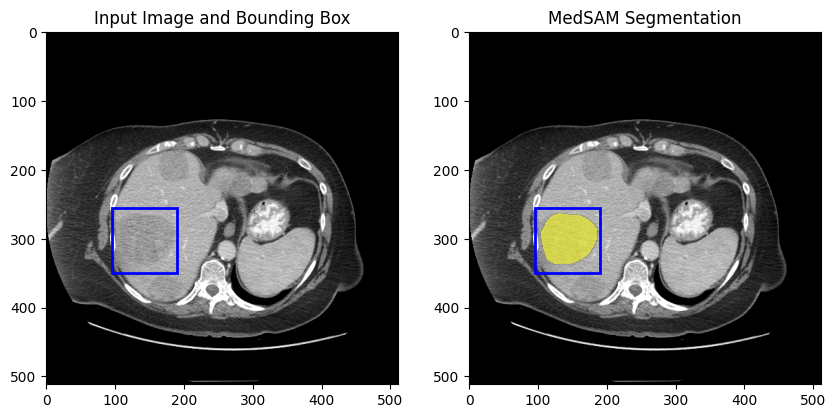

In [ ]:
# all code taken from https://github.com/bowang-lab/MedSAM
# %% environment and functions
import numpy as np
import matplotlib.pyplot as plt
import os
join = os.path.join
import torch
from segment_anything import sam_model_registry
from skimage import io, transform
import torch.nn.functional as F

# visualization functions
# source: https://github.com/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb
# change color to avoid red and green
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([251/255, 252/255, 30/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='blue', facecolor=(0,0,0,0), lw=2))

@torch.no_grad()
def medsam_inference(medsam_model, img_embed, box_1024, H, W):
    box_torch = torch.as_tensor(box_1024, dtype=torch.float, device=img_embed.device)
    if len(box_torch.shape) == 2:
        box_torch = box_torch[:, None, :] # (B, 1, 4)

    sparse_embeddings, dense_embeddings = medsam_model.prompt_encoder(
        points=None,
        boxes=box_torch,
        masks=None,
    )
    low_res_logits, _ = medsam_model.mask_decoder(
        image_embeddings=img_embed, # (B, 256, 64, 64)
        image_pe=medsam_model.prompt_encoder.get_dense_pe(), # (1, 256, 64, 64)
        sparse_prompt_embeddings=sparse_embeddings, # (B, 2, 256)
        dense_prompt_embeddings=dense_embeddings, # (B, 256, 64, 64)
        multimask_output=False,
        )

    low_res_pred = torch.sigmoid(low_res_logits)  # (1, 1, 256, 256)

    low_res_pred = F.interpolate(
        low_res_pred,
        size=(H, W),
        mode="bilinear",
        align_corners=False,
    )  # (1, 1, gt.shape)
    low_res_pred = low_res_pred.squeeze().cpu().numpy()  # (256, 256)
    medsam_seg = (low_res_pred > 0.5).astype(np.uint8)
    return medsam_seg

# download model and data
img_id = '1Qf0IQF1zTwOJ4Fh4Ix5rtVhR9cnNbI2M'
!gdown $img_id
model_id = "1UAmWL88roYR7wKlnApw5Bcuzf2iQgk6_&confirm=t"
!gdown $model_id

#%% load model and image
MedSAM_CKPT_PATH = "medsam_vit_b.pth"
device = "cuda:0"
medsam_model = sam_model_registry['vit_b'](checkpoint=MedSAM_CKPT_PATH)
medsam_model = medsam_model.to(device)
medsam_model.eval()

img_np = io.imread('img_demo.png')
if len(img_np.shape) == 2:
    img_3c = np.repeat(img_np[:, :, None], 3, axis=-1)
else:
    img_3c = img_np
H, W, _ = img_3c.shape

#%% image preprocessing and model inference
img_1024 = transform.resize(img_3c, (1024, 1024), order=3, preserve_range=True, anti_aliasing=True).astype(np.uint8)
img_1024 = (img_1024 - img_1024.min()) / np.clip(
    img_1024.max() - img_1024.min(), a_min=1e-8, a_max=None
)  # normalize to [0, 1], (H, W, 3)
# convert the shape to (3, H, W)
img_1024_tensor = torch.tensor(img_1024).float().permute(2, 0, 1).unsqueeze(0).to(device)

box_np = np.array([[95,255, 190, 350]])
# transfer box_np t0 1024x1024 scale
box_1024 = box_np / np.array([W, H, W, H]) * 1024
with torch.no_grad():
    image_embedding = medsam_model.image_encoder(img_1024_tensor) # (1, 256, 64, 64)

medsam_seg = medsam_inference(medsam_model, image_embedding, box_1024, H, W)

#%% visualize results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_3c)
show_box(box_np[0], ax[0])
ax[0].set_title("Input Image and Bounding Box")
ax[1].imshow(img_3c)
show_mask(medsam_seg, ax[1])
show_box(box_np[0], ax[1])
ax[1].set_title("MedSAM Segmentation")
plt.show()

# That's the end of the notebook!

Here is the list of all resources shared in the notebook and a couple extras:

1. LangSAM [Code](https://github.com/luca-medeiros/lang-segment-anything)
2. Grounding DiNO [Code](https://github.com/IDEA-Research/GroundingDINO) [Paper](https://arxiv.org/abs/2303.05499)
3. SAM [Code](https://github.com/facebookresearch/segment-anything) [Paper](https://arxiv.org/abs/2304.02643)
4. [Attention illustrated blog](https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a)
5. [Attention video](https://www.youtube.com/watch?v=KmAISyVvE1Y)
6. [Another attention video](https://www.youtube.com/watch?v=eMlx5fFNoYc)
7. [Cross attention](https://www.youtube.com/watch?v=aw3H-wPuRcw&list=WL&index=37)
8. [Visualise a transformer](https://bbycroft.net/llm)